In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('C:/Users/Shakil/Downloads/Video/churn.csv')
df = pd.read_excel('Churn Dataset.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
df.shape

(7043, 23)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [6]:
df.isnull().sum().sum()

0

In [7]:
# drop unnecessary column

df = df.drop('customerID', axis=1)

### Data visualization

In [96]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [97]:
retained_customer = df[df.Churn == 'No'].shape[0]
churned_customer = df[df.Churn == 'Yes'].shape[0]

print('customers that stayed:', retained_customer/(retained_customer+churned_customer)*100)
print('customers that left:', churned_customer/(retained_customer+churned_customer)*100)

customers that stayed: 73.4630129206304
customers that left: 26.536987079369588


<Axes: xlabel='gender', ylabel='count'>

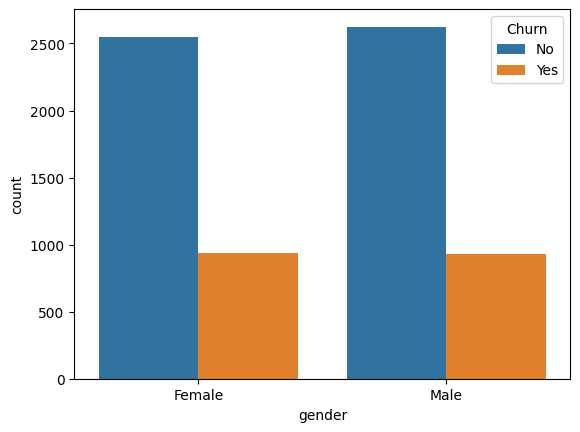

In [98]:
sns.countplot(x='gender', hue='Churn', data=df)

#### Now it's time to encoding

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
le = LabelEncoder()

#### Problem 1 
TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']

While encoding I faced a problem. Some of the columns in our dataset contain string, integer and float data types simultaneously. 
Encoding will only work on consistent data. So I need to convert that data to the exact datatype first.


In [10]:
def convert_to_object(df):
    # To convert all datatypes to strings
    return df.select_dtypes(include=['number','object']).astype(str)

In [11]:
df = convert_to_object(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   tenure            7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
 14  Contract          7043 non-null   object
 15  PaperlessBilling  7043 non-null   object
 16  PaymentMethod     7043 non-null   object
 17  MonthlyCharges

In [12]:
def convert_dtypes(df, cols_to_convert):
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
    return df

# Columns to convert 
numerical_cols = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets']

df = convert_dtypes(df.copy(), numerical_cols)  # apply the function
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


### convert categorical variable to numerical variable

In [13]:
for col in df.select_dtypes(include='object'): 
    df[col] = le.fit_transform(df[col])
df[col] = df[col].astype('int') 

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,2505,0,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1466,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,157,0,0,1
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1400,0,3,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,925,0,0,1


#### set features and target column

In [35]:
x = df.drop('Churn', axis=1)
y = df['Churn'] # target
x = StandardScaler().fit_transform(x) # features

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
log_reg = LogisticRegression() # model create
log_reg.fit(xtrain, ytrain)

LogisticRegression()

In [33]:
predictions = log_reg.predict(xtest)
predictions

array([1, 0, 0, ..., 0, 0, 1])

In [43]:
accuracy = accuracy_score(ytest, predictions) # accuracy
accuracy

0.8616039744499645

In [34]:
# classification report 

print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1036
           1       0.74      0.75      0.74       373

    accuracy                           0.86      1409
   macro avg       0.82      0.82      0.82      1409
weighted avg       0.86      0.86      0.86      1409

